# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip


--2022-03-18 19:06:45--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 3.5.160.129
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|3.5.160.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip.3’

dogImages.zip.3     100%[===================>]   1.05G  38.1MB/s    in 37s     

2022-03-18 19:07:24 (29.2 MB/s) - ‘dogImages.zip.3’ saved [1132023110/1132023110]

Archive:  dogImages.zip
replace dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [5]:
#Torch vision download
!pip install torchvision --no-cache-dir

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 21.0 MB 4.5 MB/s            
     |████████████████████████████████| 750.6 MB 122.1 MB/s            ██                   | 305.3 MB 104.3 MB/s eta 0:00:05
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [6]:
#imports

import sagemaker
import torchvision

from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)
from sagemaker.pytorch import PyTorch
from torchvision import transforms

In [27]:
#TODO: Declare your HP ranges, metrics etc.
objective_metric_name = "Accuracy"
objective_type = "Maximize"
metric_definitions = [{"Name": "Accuracy", "Regex": "Test set: Accuracy: ([0-9\\.]+)"}]
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([32, 64, 128, 256, 512]),
    "epochs": IntegerParameter(2, 4)
}

In [37]:
#TODO: Create estimators for your HPs

In [10]:
roleget = sagemaker.get_execution_role()

In [37]:
estimator = PyTorch(
    entry_point="hpo.py",
    role=roleget,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.c5.4xlarge"
)
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [38]:
sagemaker_session = sagemaker.Session()
bucket= "dogproj"
inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix="Images")

In [ ]:
# TODO: Fit your HP Tuner
import os
os.environ['SM_CHANNEL_TRAINING']='s3://dogproj/Images/'
os.environ['SM_MODEL_DIR']='s3://dogproj/Images/model/'
os.environ['SM_OUTPUT_DATA_DIR']='s3://dogproj/Images/Out/'
tuner.fit({"training": "s3://dogproj/Images/"}) # TODO: Remember to include your data channels

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [106]:


# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator() #TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

NameError: name 'tuner' is not defined

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [136]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
    ProfilerRule,
)
rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]
hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "100"}
)
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

In [47]:
hyperparameters = {"epochs": "4", "batch-size": "256", "test-batch-size": "1000", "lr": "0.0012316118290660798"}

In [113]:
# TODO: Create and fit an estimator

estimator = PyTorch(
    entry_point="train_model.py",
    role=roleget,
    py_version='py36',
    framework_version="1.8",
    hyperparameters=hyperparameters,
    instance_count=1,
    instance_type="ml.c5.4xlarge",
    rules=rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config
)

In [ ]:
import os
os.environ['SM_CHANNEL_TRAINING']='s3://dogproj/Images/'
os.environ['SM_MODEL_DIR']='s3://dogproj/Images/model/'
os.environ['SM_OUTPUT_DATA_DIR']='s3://dogproj/Images/Out/'
estimator.fit({"training": "s3://dogproj/Images/"})

2022-04-04 19:26:52 Starting - Starting the training job...
2022-04-04 19:27:22 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LossNotDecreasing: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2022-04-04 19:28:22 Downloading - Downloading input data.........
2022-04-04 19:29:53 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-04-04 19:29:47,741 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-04-04 19:29:47,743 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-04-04 19:29:47,750 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-04-04 19:29:47,757 sagemaker_pytorch_container.training INFO 

In [116]:
training_job_name = estimator.latest_training_job.name
region = "us-east-2"
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

Training jobname: pytorch-training-2022-04-04-19-26-52-417
Region: us-east-2


In [117]:
# TODO: Plot a debugging output.
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

path = estimator.latest_job_debugger_artifacts_path()
print('Tensors are stored in: {}'.format(path))

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

Tensors are stored in: s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-52-417/debug-output
[2022-04-05 21:54:23.333 datascience-1-0-ml-t3-medium-b3043d3e6163713f99726df4a911:18 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-52-417/debug-output


In [118]:
trial.tensor_names()

['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'gradient/ResNet_fc.2.bias',
 'gradient/ResNet_fc.2.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.0.relu_input_2',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer1.1.relu_input_2',
 'layer1.2.relu_input_0',
 'layer1.2.relu_input_1',
 'layer1.2.relu_input_2',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.0.relu_input_2',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer2.1.relu_input_2',
 'layer2.2.relu_input_0',
 'layer2.2.relu_input_1',
 'layer2.2.relu_input_2',
 'layer2.3.relu_input_0',
 'layer2.3.relu_input_1',
 'layer2.3.relu_input_2',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.0.relu_input_2',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer3.1.relu_input_2',
 'layer3.2.relu_input_0',
 'layer3.2.relu_input_1',
 'layer3.2.relu_input_2',
 'layer3.3.relu_input_0',
 'layer3.3.relu_input_1',
 'layer3.3.rel

In [119]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals


In [142]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    tensor_name = tensor_name
    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    
    par.xaxis.get_label().set_color(p2.get_color())
    
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()


loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


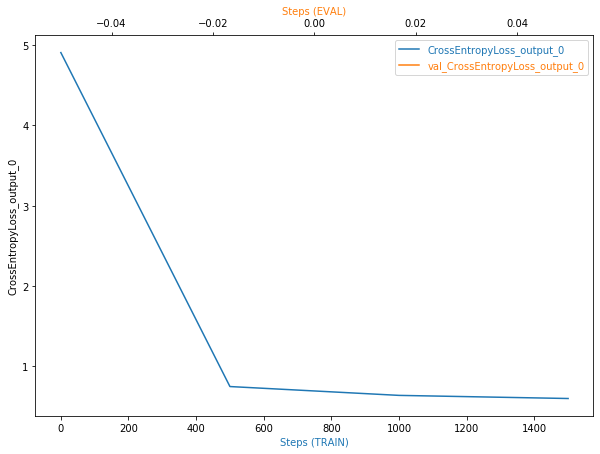

In [143]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
## The model is not generalizing. Valid reaches 10% around epoch 5 and flatlines where the train reaches 84% by the end of the epochs. Testing accuracy is 84 so valid must be wrong.
## Fixed the script the model was fine, but the valid logger.info was using the wrong data set so I fixed the math.

In [144]:
# TODO: Display the profiler output
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob

tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()

ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-2-669350239385/', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }'}}
s3 path:s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-52-417/profiler-output


Profiler data from system is available


In [145]:
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)

[2022-04-06 20:12:24.064 datascience-1-0-ml-t3-medium-b3043d3e6163713f99726df4a911:18 INFO metrics_reader_base.py:134] Getting 334 event files
[2022-04-06 20:12:24.240 datascience-1-0-ml-t3-medium-b3043d3e6163713f99726df4a911:18 WARNING s3handler.py:183] Encountered the exception [SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:2570) while reading s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-52-417/profiler-output/system/incremental/2022040419/1649101740.algo-1.json . Will retry now
select events:['total']
select dimensions:['CPU', 'GPU']
filtered_events:{'total'}
filtered_dimensions:{'CPUUtilization-nodeid:algo-1'}


In [146]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-52-417/rule-output


In [147]:
! aws s3 ls {rule_output_path} --recursive

2022-04-05 01:02:04     386749 pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-04-05 01:02:04     236796 pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-04-05 01:01:59        193 pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-04-05 01:01:59        201 pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-04-05 01:01:59       2030 pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-04-05 01:01:59        127 pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-04-05 01:01:59        200 pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-re

In [148]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-reports/LowGPUUtilization.json to ProfilerReport/profiler-output/profiler-reports/LowGPUUtilization.json
download: s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-52-417/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb to ProfilerReport/profiler-output/profiler-report.ipynb
download: s3://sagemaker-us-east-2-669350239385/pytorch-training-2022-04-04-19-26-

In [62]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [149]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [151]:
from sagemaker.model_monitor import DataCaptureConfig

data_capture_config = DataCaptureConfig(
    ## TODO: Set config options
    enable_capture = True,
    sampling_percentage=100,
    destination_s3_uri=f"s3://dogproj/data_capture"
)

In [152]:
# TODO: Deploy your model to an endpoint

deployment=estimator.deploy(initial_instance_count=1,instance_type="ml.c5.4xlarge",endpoint_name='DogNN',data_capture_config=data_capture_config) # TODO: Add your deployment configuration like instance type and number of instances

-------------!

In [153]:
predictor = deployment

In [87]:
from sagemaker.serializers import JSONSerializer
from sagemaker.deserializers import  JSONDeserializer
predictor.serializer = JSONSerializer()
predictor.deserializer = JSONDeserializer()
with open("Akita_00282.jpg", "rb") as f:
    payload = f.read()


response = predictor.predict(payload)
response

TypeError: Object of type bytes is not JSON serializable

In [ ]:


# TODO: Run an prediction on the endpoint
from sagemaker.serializers import IdentitySerializer
from sagemaker.deserializers import  JSONDeserializer
import base64

##predictor.serializer = IdentitySerializer("image/jpg")
with open("Akita_00282.jpg", "rb") as f:
    payload = f.read()
##predictor.deserializer = JSONDeserializer()

    
response = predictor.predict(payload)


In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()